# King County Housing Linear Regression Project


* Student name: Seyma Tas
* Student pace:  Full time
* Scheduled project review date/time: 05-04-2020
* Instructor name: Amber Yandow
* Blog post URL:


## OSEMN Approach
1 - Obtaining the data 2 - Scrubbing the data 3 - Exploring the data 4 - Modeling the data 5 - iNterpreting the results


![title](picture2.png)


## Questions:

1) What are the main factors to predict the price of a house?

2) How much does a middle income family should invest to buy a standard house?
   
   or What are the properties of a house you can buy in King County if your budget is $400,000???
    
3) How can a middle income family increase the price of their house by %20 by spending %5 of the house cost???

4) Basement
 

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
# # Print all the interactive output without resorting to print
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

## Import the necessary packages

First, we’ll import all of our necessary packages.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

sns.set(style='darkgrid')

In [4]:
# ## Display more information 
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

In [5]:
## Hide the warning boxes
import warnings
warnings.filterwarnings('ignore')

## Import the data set

Next, we’ll import our data and see what we’re working with. 

In [6]:
df=pd.read_csv('kc_house_data.csv')

Lets see what the data looks like by functions head(), tail(), shape(), info() and describe().

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Drop unnecaessary columns

In [8]:
df=df.drop(['id','date'],axis=1)

# Scraping and cleaning data

In [9]:
df.shape

(21597, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.1+ MB


### Numerical Data Stored as Strings

In [11]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1481.0        1
176.0         1
1548.0        1
207.0         1
2580.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [12]:
df['sqft_basement']=df['sqft_basement'].map(lambda x:float(x.replace('?', '0')))


In [13]:
#Replace 0 with difference between sqft_above and sqft_living
df['sqft_basement'].replace(to_replace='0', value = abs(df['sqft_living']-df['sqft_above']), inplace=True)


In [14]:
df['bedrooms'].replace(to_replace=33, value =3, inplace=True)


In [15]:
df['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [16]:
df.describe().round(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,540296.6,3.4,2.1,2080.3,15099.4,1.5,0.0,0.2,3.4,7.7,1788.6,285.7,1971.0,83.6,98078.0,47.6,-122.2,1986.6,12758.3
std,367368.1,0.9,0.8,918.1,41412.6,0.5,0.1,0.8,0.7,1.2,827.8,439.8,29.4,399.9,53.5,0.1,0.1,685.2,27274.4
min,78000.0,1.0,0.5,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,0.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0
25%,322000.0,3.0,1.8,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.5,-122.3,1490.0,5100.0
50%,450000.0,3.0,2.2,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7620.0
75%,645000.0,4.0,2.5,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,550.0,1997.0,0.0,98118.0,47.7,-122.1,2360.0,10083.0
max,7700000.0,11.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.8,-121.3,6210.0,871200.0


### Buraya describe ile ilgili yorum yaz
Most houses were build around 1975; sold for $450K; had square footage of living spaces around 1910. You can also note, that distributions of price and variables such as sqft_lot are skewed to the upper tail.



## Detecting and Dealing With Null Values

In [17]:
print(df.isna().sum())

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


### Buraya na values  ile ilgili yorum yaz


# waterfront ve view 

In [18]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [19]:
df['view'].isna().sum()

63

In [20]:
feats = ['view', 'waterfront']
df[feats].corr()

,view,waterfront
view,1.000000,0.406654
waterfront,0.406654,1.000000


In [21]:
print('Number missing both:',
      len(df[(df.view.isnull())
      & (df.waterfront.isnull())]))

Number missing both: 6


In [22]:
len(df[(df.view==2)&(df.waterfront.isna())])

121

In [23]:
len(df[(df.view==3)&(df.waterfront>0)])

14

In [24]:
df['view'].fillna(0,inplace=True)

In [25]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [26]:
df['waterfront'].nunique()

2

In [27]:
df['waterfront'].isna().sum()

2376

In [28]:
df['waterfront'].fillna(0,inplace=True)

In [29]:
feats = ['view', 'waterfront']
df[feats].corr()

,view,waterfront
view,1.000000,0.380543
waterfront,0.380543,1.000000


In [30]:
df.yr_renovated.fillna(0, inplace=True)

## Check the distributions

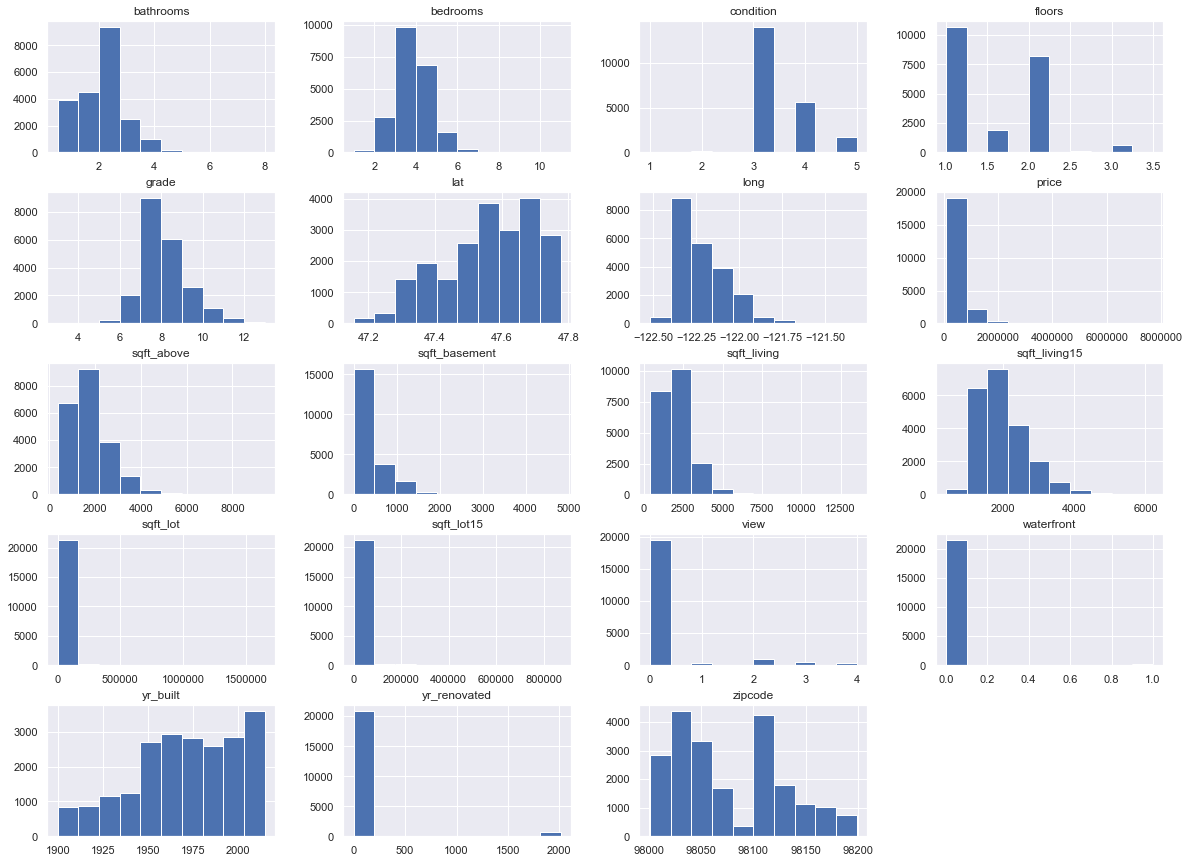

In [31]:
df.hist(figsize=(20,15))
plt.show()


### Outliers

In [32]:
# Q1 = df.quantile(0.001)
# Q3 = df.quantile(0.999)
# IQR = Q3 - Q1

# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

## Log transformation of data

In [33]:
non_normal = ['price','sqft_living', 'sqft_lot','sqft_above','sqft_basement',
              'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log1p(x))
# pd.plotting.scatter_matrix(df[x_cols], figsize=(10,12));

In [34]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## Normalizing the data

In [35]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['bathrooms', 'sqft_living', 'sqft_lot','sqft_above', 'sqft_basement', 'yr_built','yr_renovated','sqft_living15', 'sqft_lot15']:
    df[feat] = norm_feat(df[feat])


In [36]:
df.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,-0.00,-0.00,0.00,1.49,0.01,0.23,3.41,7.66,0.00,-0.00,0.00,-0.00,98077.95,47.56,-122.21,-0.00,-0.00
std,367368.14,0.90,1.00,1.00,1.00,0.54,0.08,0.76,0.65,1.17,1.00,1.00,1.00,1.00,53.51,0.14,0.14,1.00,1.00
min,78000.00,1.00,-2.10,-1.86,-0.35,1.00,0.00,0.00,1.00,3.00,-1.71,-0.65,-2.42,-0.19,98001.00,47.16,-122.52,-2.32,-0.44
25%,322000.00,3.00,-0.48,-0.71,-0.24,1.00,0.00,0.00,3.00,7.00,-0.72,-0.65,-0.68,-0.19,98033.00,47.47,-122.33,-0.72,-0.28
50%,450000.00,3.00,0.17,-0.19,-0.18,1.50,0.00,0.00,3.00,7.00,-0.28,-0.65,0.14,-0.19,98065.00,47.57,-122.23,-0.21,-0.19
75%,645000.00,4.00,0.50,0.51,-0.11,2.00,0.00,0.00,4.00,8.00,0.51,0.60,0.89,-0.19,98118.00,47.68,-122.12,0.54,-0.10
max,7700000.00,11.00,7.65,12.48,39.51,3.50,1.00,4.00,5.00,13.00,9.21,10.31,1.50,5.35,98199.00,47.78,-121.32,6.16,31.47


In [37]:
df.to_csv("king_county_dataset_cleaned.csv", index=False)


## Check the distributions again!

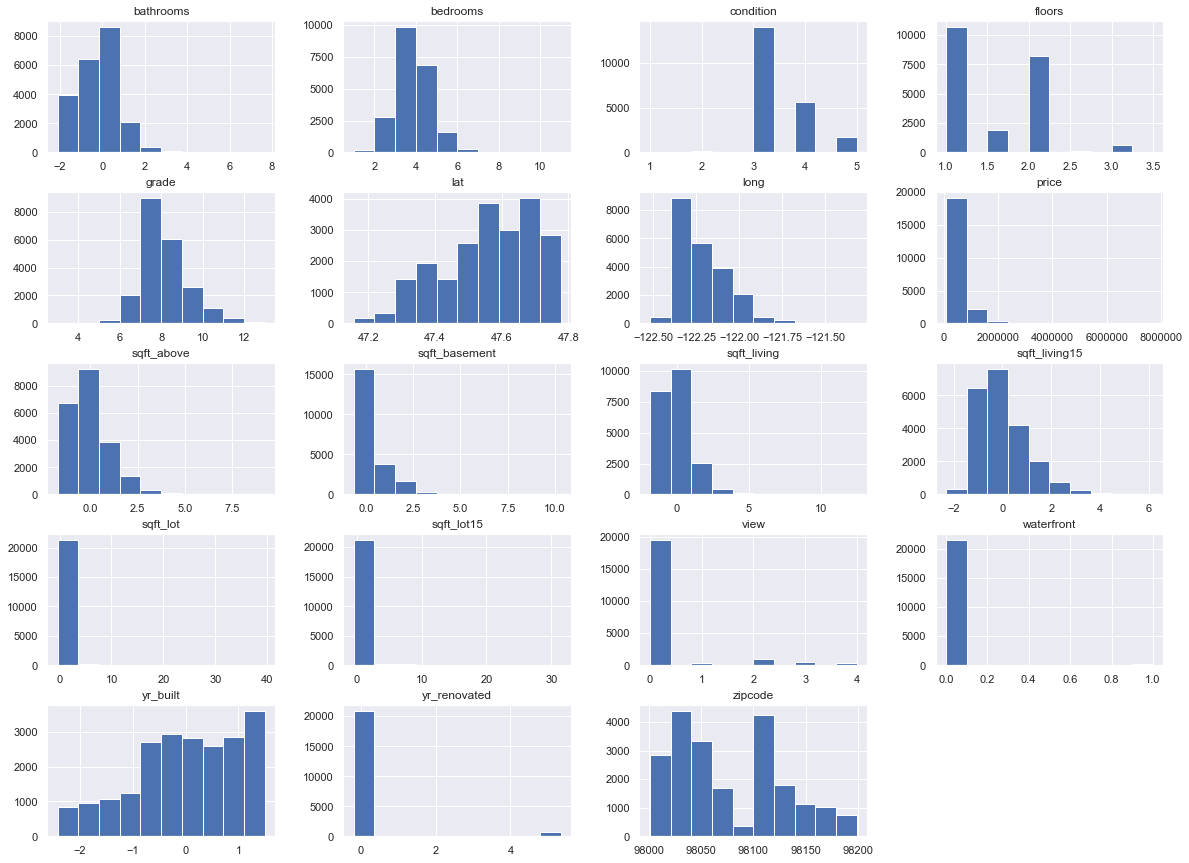

In [38]:
df.hist(figsize=(20,15))
plt.show()

## One-Hot Encoding Categorical Columns


#### Identifying Categorical Variables

These columns can be thought as categorical values. Bedrooms, floors, waterfront, wiev, grade, zipcode and year renovated.
Let's explore them one by one.

In [39]:
df['bedrooms'] = df['bedrooms'].astype('category')
df['floors'] = df['floors'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['zipcode'] = df['zipcode'].astype('category')

In [40]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [41]:
feats = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15']
df_feats = df[feats]
df_feats_zipcode=df_feats.copy()
df_feats = pd.get_dummies(df_feats, drop_first=True)

In [42]:
df_feats.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=113)

In [43]:
df_feats.head()

,price,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,-1.451039,-0.980629,-0.228177,-0.735234,-0.649622,-0.544665,-0.188877,-0.943654,-0.260621,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,0.174482,0.533357,-0.189735,0.460766,0.259841,-0.680835,5.280340,-0.432877,-0.187695,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,-1.451039,-1.427201,-0.123137,-1.230546,-0.649622,-1.293596,-0.188877,1.070267,-0.172186,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1.149794,-0.131054,-0.243873,-0.892284,1.419407,-0.204243,-0.188877,-0.914467,-0.284453,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.150622,-0.436030,-0.169499,-0.131194,-0.649622,0.544688,-0.188877,-0.272347,-0.192682,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_feats.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=113)

# Exploring the data

In [45]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,-1.451039,-0.980629,-0.228177,1.0,0.0,0.0,3,7,-0.735234,-0.649622,-0.544665,-0.188877,98178,47.5112,-122.257,-0.943654,-0.260621
1,538000.0,3,0.174482,0.533357,-0.189735,2.0,0.0,0.0,3,7,0.460766,0.259841,-0.680835,5.280340,98125,47.7210,-122.319,-0.432877,-0.187695
2,180000.0,2,-1.451039,-1.427201,-0.123137,1.0,0.0,0.0,3,6,-1.230546,-0.649622,-1.293596,-0.188877,98028,47.7379,-122.233,1.070267,-0.172186
3,604000.0,4,1.149794,-0.131054,-0.243873,1.0,0.0,0.0,5,7,-0.892284,1.419407,-0.204243,-0.188877,98136,47.5208,-122.393,-0.914467,-0.284453
4,510000.0,3,-0.150622,-0.436030,-0.169499,1.0,0.0,0.0,3,8,-0.131194,-0.649622,0.544688,-0.188877,98074,47.6168,-122.045,-0.272347,-0.192682


In [46]:
df_feats.head()

,price,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,-1.451039,-0.980629,-0.228177,-0.735234,-0.649622,-0.544665,-0.188877,-0.943654,-0.260621,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,0.174482,0.533357,-0.189735,0.460766,0.259841,-0.680835,5.280340,-0.432877,-0.187695,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,-1.451039,-1.427201,-0.123137,-1.230546,-0.649622,-1.293596,-0.188877,1.070267,-0.172186,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1.149794,-0.131054,-0.243873,-0.892284,1.419407,-0.204243,-0.188877,-0.914467,-0.284453,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.150622,-0.436030,-0.169499,-0.131194,-0.649622,0.544688,-0.188877,-0.272347,-0.192682,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_plot=df[['price', 'bedrooms','bathrooms','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode','lat','long','sqft_living15','sqft_lot15']].copy()

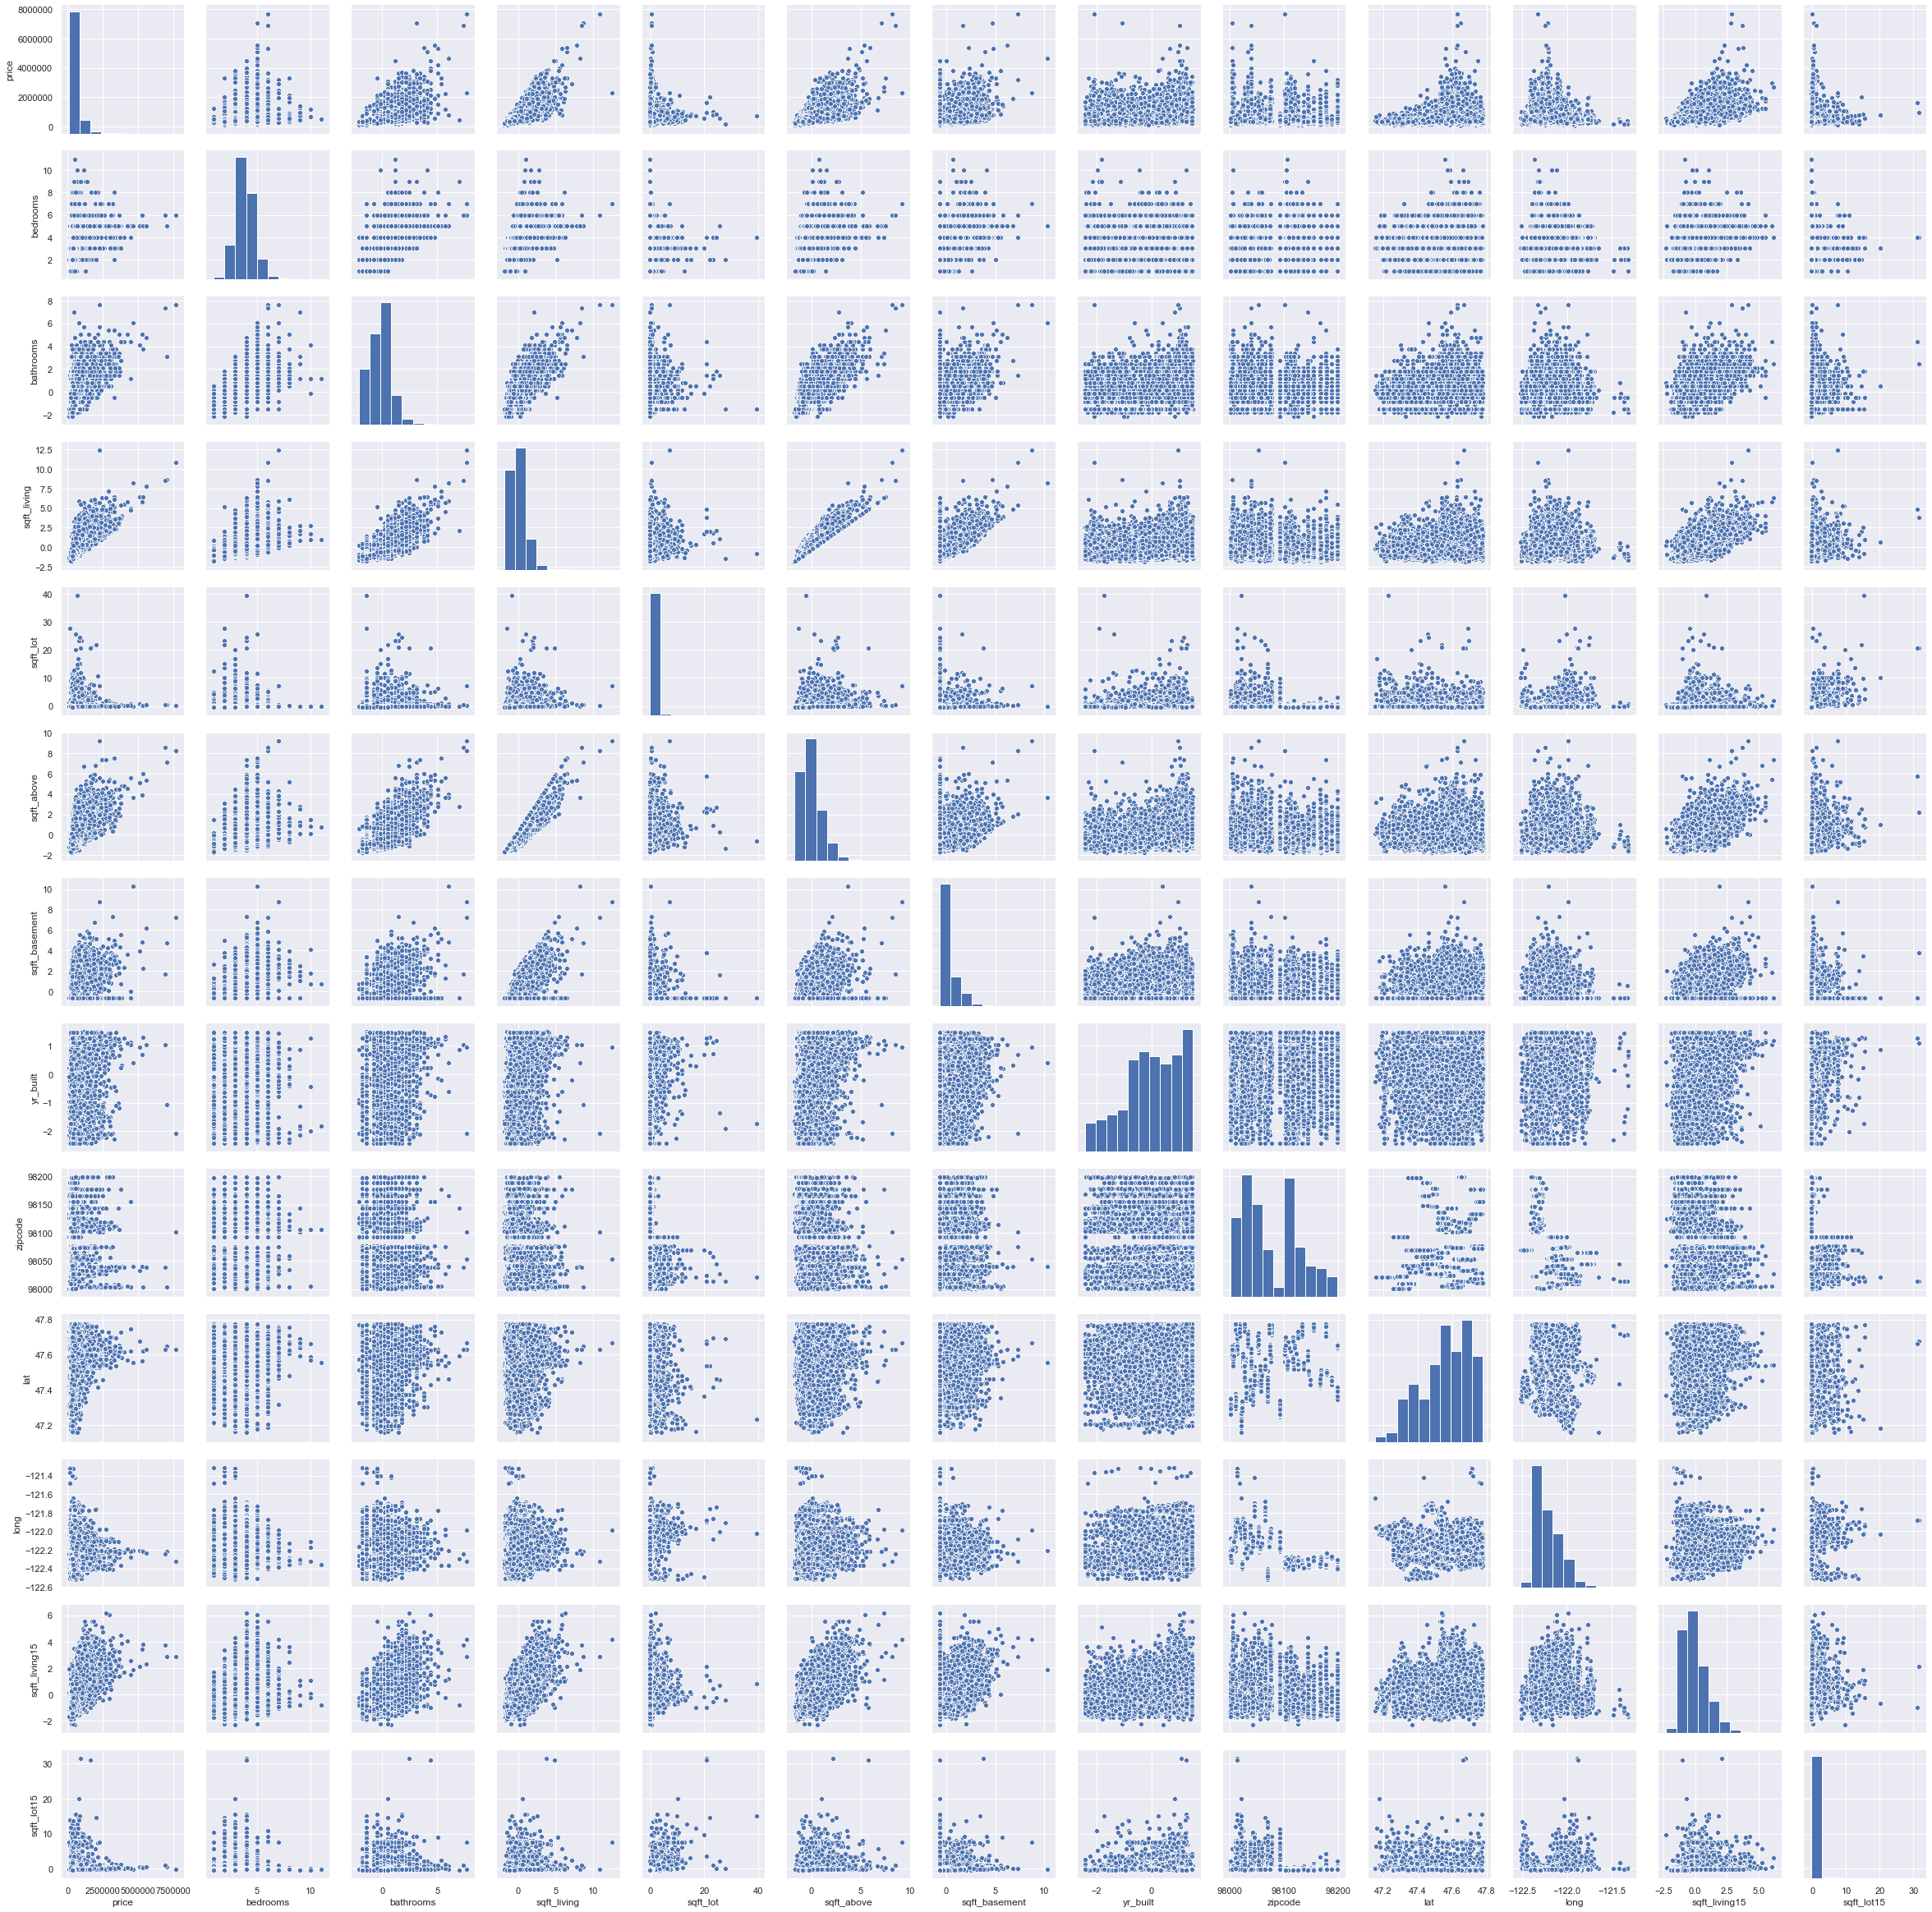

In [48]:
sns.pairplot(df_plot)
plt.show()

## Check for Linearity

jointplots

## Check for Multicollinearity

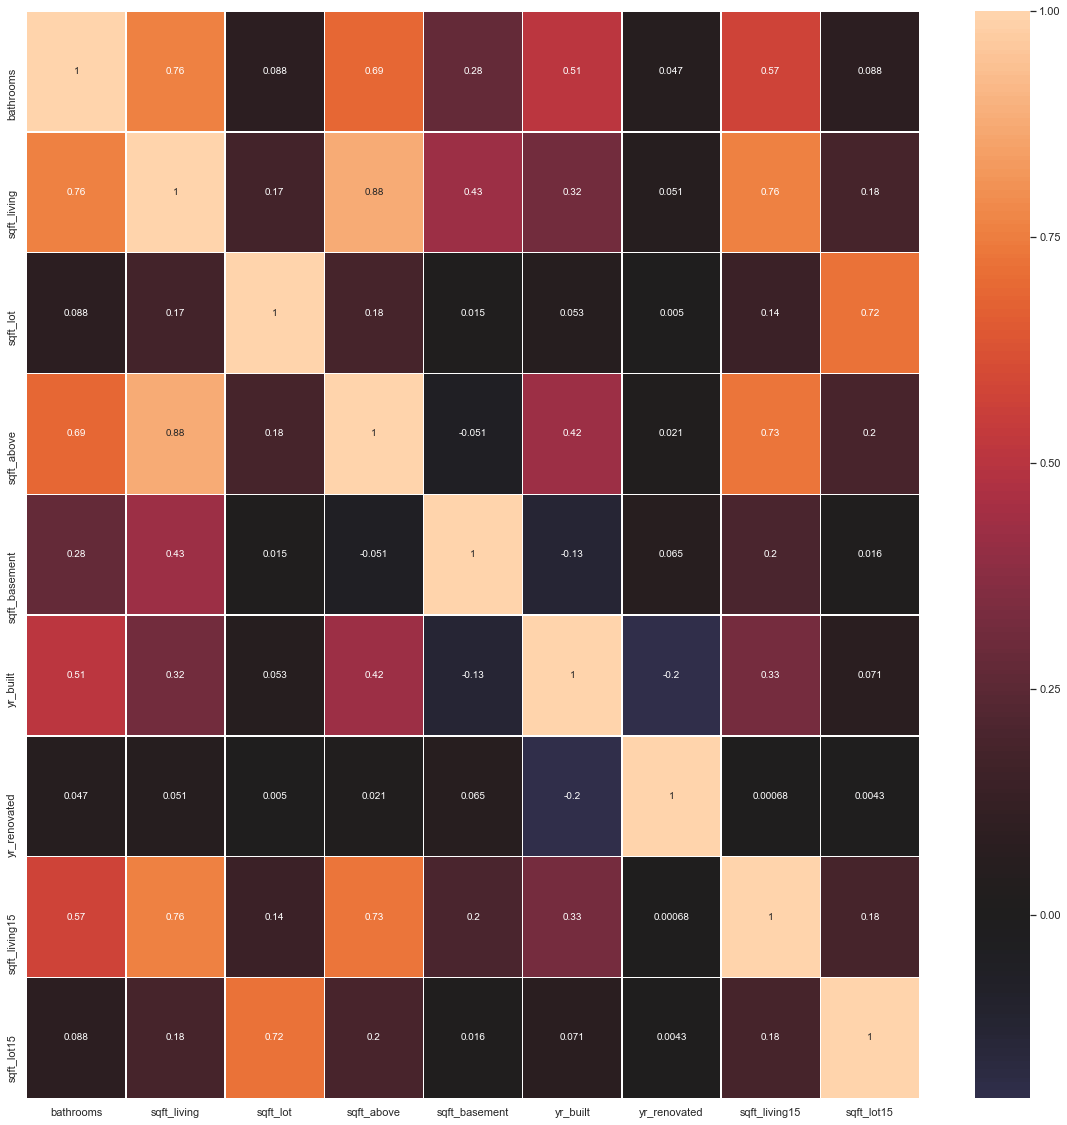

In [49]:
# df_target = df_no_outliers.loc['price']
df_heatmap=df.drop(['price','zipcode', 'lat', 'long'],axis=1)
plt.figure(figsize=(20,20))
ax=sns.heatmap(df_heatmap.corr(), center=0, linewidths=.5,annot=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [50]:
df_heatmap.corr() > 0.75


,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bathrooms,True,True,False,False,False,False,False,False,False
sqft_living,True,True,False,True,False,False,False,True,False
sqft_lot,False,False,True,False,False,False,False,False,False
sqft_above,False,True,False,True,False,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False,False
yr_built,False,False,False,False,False,True,False,False,False
yr_renovated,False,False,False,False,False,False,True,False,False
sqft_living15,False,True,False,False,False,False,False,True,False
sqft_lot15,False,False,False,False,False,False,False,False,True


# Modeling the data

## Baseline Model 

In [51]:
outcome = 'price'
x_cols = [ 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10',
       'bedrooms_11', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'floors_3_5', 'waterfront_1_0', 'view_1_0', 'view_2_0', 'view_3_0',
       'view_4_0', 'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155',
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199','zipcode_98014']


In [52]:
# df_feats.columns = [col.replace('.', '_', inplace=True) for col in df_feats.columns]
# df_feats.columns = [col.replace(' ', '_', inplace=True) for col in df_feats.columns]
df_feats.columns = df_feats.columns.str.replace(r"[.]", "_")

In [53]:
df_feats.columns[:50]

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10',
       'bedrooms_11', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'floors_3_5', 'waterfront_1_0', 'view_1_0', 'view_2_0', 'view_3_0',
       'view_4_0', 'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007'],
      dtype='object')

In [54]:
df_feats.columns[50:]

Index(['zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', '

In [55]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_feats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     976.9
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:25:30   Log-Likelihood:            -2.8788e+05
No. Observations:               21597   AIC:                         5.760e+05
Df Residuals:                   21484   BIC:                         5.769e+05
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.828e+05   1.52e+05      2.511      0.012    8.39e+04    6.82e+05
bathrooms       1.942e+04   1906.433     10.187      0.000    1.57e+04    2.32e+04
sqft_living     9.219e+04   1.24e+04      7.462      0.000     6.8e+04    1.16e+05
sqft_lot        1.007e+04   1480.478      6.803      0.000    7170.203     1.3e+04
sqft_above      5.395e+04   1.12e+04      4.826      0.000     3.2e+04    7.59e+04
sqft_basement   6336.4983   5855.225      1.082      0.279   -5140.179    1.78e+04
yr_built       -7833.0995   1910.879     -4.099      0.000   -1.16e+04   -4087.634
yr_renovated    1.053e+04   1091.365      9.646      0.000    8388.229    1.27e+04
sqft_living15   1.167e+04   1865.590      6.253      0.000    8008.417    1.53e+04
sqft_lot15     -4275.0384   1532.700     -2.789      0.005   -7279.244   -1270.833
bedrooms_2      5781.7674   1.13e+04      0.510      0.610   -1.65e+04     2.8e+04
bedrooms_3      4697.0380   1.13e+04      0.414      0.679   -1.75e+04    2.69e+04
bedrooms_4     -1.702e+04   1.16e+04     -1.468      0.142   -3.98e+04    5706.098
bedrooms_5     -2.645e+04   1.23e+04     -2.158      0.031   -5.05e+04   -2421.252
bedrooms_6     -4.176e+04    1.5e+04     -2.790      0.005   -7.11e+04   -1.24e+04
bedrooms_7     -1.298e+05   2.73e+04     -4.753      0.000   -1.83e+05   -7.63e+04
bedrooms_8     -1.806e+04   4.36e+04     -0.415      0.678   -1.03e+05    6.73e+04
bedrooms_9     -2.365e+05   6.27e+04     -3.772      0.000   -3.59e+05   -1.14e+05
bedrooms_10     -2.89e+05   8.72e+04     -3.313      0.001    -4.6e+05   -1.18e+05
bedrooms_11     -9.92e+04    1.5e+05     -0.661      0.509   -3.93e+05    1.95e+05
floors_1_5     -1.001e+04   4144.507     -2.415      0.016   -1.81e+04   -1886.294
floors_2_0     -3.046e+04   3483.382     -8.745      0.000   -3.73e+04   -2.36e+04
floors_2_5      4.708e+04   1.25e+04      3.775      0.000    2.26e+04    7.15e+04
floors_3_0     -7.503e+04   7720.926     -9.718      0.000   -9.02e+04   -5.99e+04
floors_3_5     -5595.4377    5.7e+04     -0.098      0.922   -1.17e+05    1.06e+05
waterfront_1_0  5.966e+05   1.54e+04     38.728      0.000    5.66e+05    6.27e+05
view_1_0        8.682e+04   8506.120     10.207      0.000    7.01e+04    1.03e+05
view_2_0        6.866e+04   5198.526     13.207      0.000    5.85e+04    7.88e+04
view_3_0        1.517e+05   7104.511     21.354      0.000    1.38e+05    1.66e+05
view_4_0        2.989e+05   1.07e+04     27.884      0.000    2.78e+05     3.2e+05
condition_2     9.009e+04   3.02e+04      2.987      0.003     3.1e+04    1.49e+05
condition_3     9.893e+04   2.81e+04      3.524      0.000    4.39e+04    1.54e+05
condition_4     1.229e+05   2.81e+04      4.374      0.000    6.78e+04    1.78e+05
condition_5     1.669e+05   2.83e+04      5.905      0.000    1.11e+05    2.22e+05
grade_4     

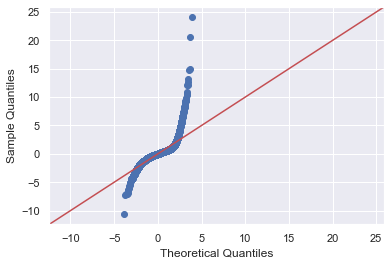

In [56]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

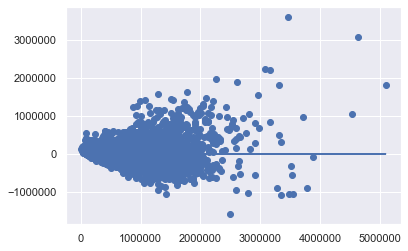

In [57]:
plt.scatter(model.predict(df_feats[x_cols]), model.resid)
plt.plot(model.predict(df_feats[x_cols]), [0 for i in range(len(df_feats))])
plt.show()

In [58]:
X = df_feats[x_cols]

In [59]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bathrooms', 3.524818833994868),
 ('sqft_living', 148.03820628172252),
 ('sqft_lot', 2.1258625555630024),
 ('sqft_above', 121.23323674983178),
 ('sqft_basement', 33.25209137529917),
 ('yr_built', 3.54037161736759),
 ('yr_renovated', 1.1551971110236876),
 ('sqft_living15', 3.375672661328627),
 ('sqft_lot15', 2.2784183434882346),
 ('bedrooms_2', 15.948302721550347),
 ('bedrooms_3', 56.763302896156276),
 ('bedrooms_4', 41.56372587589776),
 ('bedrooms_5', 10.80548490074894),
 ('bedrooms_6', 2.7363743380565766),
 ('bedrooms_7', 1.2719339800344356),
 ('bedrooms_8', 1.1077940060760203),
 ('bedrooms_9', 1.0598338407551111),
 ('bedrooms_10', 1.0251978480590003),
 ('bedrooms_11', 1.0112400609326682),
 ('floors_1_5', 1.4734386159087758),
 ('floors_2_0', 4.486540522408),
 ('floors_2_5', 1.1241795896749398),
 ('floors_3_0', 1.6356466881739573),
 ('floors_3_5', 1.0227647853059076),
 ('waterfront_1_0', 1.5561626584731083),
 ('view_1_0', 1.072345686222209),
 ('view_2_0', 1.1615053900166492),
 ('view

## K-fold Cross Validation for Model 1

In [60]:
X = df_feats[x_cols]
y = df_feats['price']

linreg = LinearRegression()
cvs_10=cross_val_score(linreg, X, y, cv=10)
cvs_10_res_mean = round(np.mean(cvs_10),5)
cv_10_res_std = round(np.std(cvs_10),5)
print(f'Mean cross validation score for 10 fold is {cvs_10_res_mean}')
print(f'Standard deviation of the score is {cv_10_res_std}')


Mean cross validation score for 10 fold is -2.1454126915955737e+19
Standard deviation of the score is 6.385960910265775e+19


## Perform stepwise selection

In [61]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [62]:
X = df_feats[x_cols]
# X = df_feats.drop('price', axis=1)
y = df_feats['price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  waterfront_1_0                 with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  floors_2_0                     with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  zipcode_98004                  with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  zipcode_98039                  with p-value 2.06917e-260
Add  zipcode_98112                  with p-value 1.73357e-183
Add  zipcode_98040                  with p-value 1.58937e-176
Add  grade_12                       with p-value 8.67322e-152
Drop floors_2_0                     with p-value 0.0838388
Add  grade_13                       with p-value 2.52707e-166
Add  grade_11                       with p-value 2.3868e-191
Add  grade_10                       with p-value 7.03185e-247
Add  grade_9                        with p-value 1.96806e-261
Add  grade_8                        with p-value 3.62962e-190
Add  zipcode_

In [63]:
a=['grade_6', 'sqft_living', 'grade_7', 'grade_8', 'grade_5', 'zipcode_98004', 'zipcode_98023', 'grade_9', 'waterfront_1_0', 'sqft_living15', 'zipcode_98003', 'zipcode_98092', 'zipcode_98038', 'zipcode_98002', 'zipcode_98032', 'zipcode_98039', 'bathrooms', 'zipcode_98033', 'zipcode_98040', 'zipcode_98112', 'zipcode_98115', 'zipcode_98117', 'zipcode_98103', 'zipcode_98199', 'zipcode_98105', 'zipcode_98119', 'zipcode_98107', 'zipcode_98116', 'zipcode_98109', 'zipcode_98122', 'zipcode_98102', 'view_4_0', 'zipcode_98006', 'zipcode_98052', 'zipcode_98136', 'zipcode_98144', 'sqft_lot', 'zipcode_98008', 'zipcode_98005', 'grade_4', 'zipcode_98053', 'view_3_0', 'zipcode_98029', 'zipcode_98126', 'zipcode_98125', 'zipcode_98034', 'zipcode_98177', 'zipcode_98007', 'condition_5', 'zipcode_98074', 'zipcode_98075', 'grade_10', 'zipcode_98027', 'view_2_0', 'sqft_above', 'zipcode_98133', 'zipcode_98118', 'zipcode_98072', 'zipcode_98155', 'condition_4', 'condition_3', 'view_1_0', 'zipcode_98011', 'zipcode_98065', 'zipcode_98028', 'zipcode_98077', 'zipcode_98106', 'yr_renovated', 'zipcode_98108', 'zipcode_98059', 'zipcode_98056', 'zipcode_98024', 'grade_11', 'floors_3_0', 'zipcode_98166', 'zipcode_98146', 'zipcode_98045', 'zipcode_98019', 'zipcode_98014', 'zipcode_98070', 'zipcode_98010', 'zipcode_98058', 'zipcode_98178', 'zipcode_98055', 'sqft_basement', 'sqft_lot15', 'bedrooms_7', 'zipcode_98148', 'grade_13', 'bedrooms_2', 'condition_2', 'floors_2_0', 'bedrooms_6', 'zipcode_98188', 'zipcode_98168', 'bedrooms_5', 'bedrooms_9']

In [64]:
len(a)

97

In [65]:
b=['grade_7', 'sqft_living', 'zipcode_98004', 'waterfront_1_0', 'zipcode_98039', 'zipcode_98112', 'grade_13', 'grade_12', 'grade_11', 'grade_10', 'grade_6', 'zipcode_98040', 'grade_9', 'zipcode_98033', 'zipcode_98023', 'view_4_0', 'zipcode_98105', 'zipcode_98119', 'zipcode_98199', 'zipcode_98103', 'zipcode_98115', 'zipcode_98117', 'zipcode_98109', 'zipcode_98107', 'zipcode_98102', 'zipcode_98122', 'view_3_0', 'zipcode_98116', 'zipcode_98052', 'zipcode_98144', 'zipcode_98006', 'zipcode_98008', 'zipcode_98005', 'zipcode_98053', 'zipcode_98034', 'zipcode_98136', 'zipcode_98029', 'zipcode_98092', 'zipcode_98125', 'zipcode_98177', 'condition_5', 'zipcode_98007', 'zipcode_98126', 'zipcode_98074', 'zipcode_98075', 'zipcode_98027', 'zipcode_98133', 'zipcode_98118', 'view_2_0', 'zipcode_98072', 'zipcode_98155', 'sqft_above', 'view_1_0', 'yr_renovated', 'zipcode_98028', 'sqft_lot', 'zipcode_98106', 'zipcode_98011', 'condition_4', 'sqft_living15', 'bedrooms_3', 'zipcode_98108', 'floors_3_0', 'floors_2_0', 'bathrooms', 'zipcode_98146', 'zipcode_98056', 'zipcode_98077', 'zipcode_98024', 'zipcode_98065', 'zipcode_98059', 'zipcode_98045', 'zipcode_98019', 'bedrooms_2', 'zipcode_98014', 'zipcode_98166', 'bedrooms_7', 'zipcode_98168', 'floors_2_5', 'yr_built', 'bedrooms_9', 'zipcode_98038', 'zipcode_98055', 'zipcode_98058', 'bedrooms_10', 'zipcode_98010', 'zipcode_98148', 'sqft_lot15', 'zipcode_98178']

In [66]:
len(b)

89

In [67]:
print(a)

['grade_6', 'sqft_living', 'grade_7', 'grade_8', 'grade_5', 'zipcode_98004', 'zipcode_98023', 'grade_9', 'waterfront_1_0', 'sqft_living15', 'zipcode_98003', 'zipcode_98092', 'zipcode_98038', 'zipcode_98002', 'zipcode_98032', 'zipcode_98039', 'bathrooms', 'zipcode_98033', 'zipcode_98040', 'zipcode_98112', 'zipcode_98115', 'zipcode_98117', 'zipcode_98103', 'zipcode_98199', 'zipcode_98105', 'zipcode_98119', 'zipcode_98107', 'zipcode_98116', 'zipcode_98109', 'zipcode_98122', 'zipcode_98102', 'view_4_0', 'zipcode_98006', 'zipcode_98052', 'zipcode_98136', 'zipcode_98144', 'sqft_lot', 'zipcode_98008', 'zipcode_98005', 'grade_4', 'zipcode_98053', 'view_3_0', 'zipcode_98029', 'zipcode_98126', 'zipcode_98125', 'zipcode_98034', 'zipcode_98177', 'zipcode_98007', 'condition_5', 'zipcode_98074', 'zipcode_98075', 'grade_10', 'zipcode_98027', 'view_2_0', 'sqft_above', 'zipcode_98133', 'zipcode_98118', 'zipcode_98072', 'zipcode_98155', 'condition_4', 'condition_3', 'view_1_0', 'zipcode_98011', 'zipcode

In [68]:
len(x_cols)

112

In [69]:
len(x_cols)

112

## Model Refinement I

In [70]:
outcome = 'price'
x_cols = ['grade_6', 'sqft_living', 'grade_7', 'grade_8', 'grade_5', 'zipcode_98004', 'zipcode_98023', 'grade_9', 'waterfront_1_0', 'sqft_living15', 'zipcode_98003', 'zipcode_98092', 'zipcode_98038', 'zipcode_98002', 'zipcode_98032', 'zipcode_98039', 'bathrooms', 'zipcode_98033', 'zipcode_98040', 'zipcode_98112', 'zipcode_98115', 'zipcode_98117', 'zipcode_98103', 'zipcode_98199', 'zipcode_98105', 'zipcode_98119', 'zipcode_98107', 'zipcode_98116', 'zipcode_98109', 'zipcode_98122', 'zipcode_98102', 'view_4_0', 'zipcode_98006', 'zipcode_98052', 'zipcode_98136', 'zipcode_98144', 'sqft_lot', 'zipcode_98008', 'zipcode_98005', 'grade_4', 'zipcode_98053', 'view_3_0', 'zipcode_98029', 'zipcode_98126', 'zipcode_98125', 'zipcode_98034', 'zipcode_98177', 'zipcode_98007', 'condition_5', 'zipcode_98074', 'zipcode_98075', 'grade_10', 'zipcode_98027', 'view_2_0', 'sqft_above', 'zipcode_98133', 'zipcode_98118', 'zipcode_98072', 'zipcode_98155', 'condition_4', 'condition_3', 'view_1_0', 'zipcode_98011', 'zipcode_98065', 'zipcode_98028', 'zipcode_98077', 'zipcode_98106', 'yr_renovated', 'zipcode_98108', 'zipcode_98059', 'zipcode_98056', 'zipcode_98024', 'grade_11', 'floors_3_0', 'zipcode_98166', 'zipcode_98146', 'zipcode_98045', 'zipcode_98019', 'zipcode_98014', 'zipcode_98070', 'zipcode_98010', 'zipcode_98058', 'zipcode_98178', 'zipcode_98055', 'sqft_basement', 'sqft_lot15', 'bedrooms_7', 'zipcode_98148', 'grade_13', 'bedrooms_2', 'condition_2', 'floors_2_0', 'bedrooms_6', 'zipcode_98188', 'zipcode_98168', 'bedrooms_5', 'bedrooms_9']


In [71]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_feats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1120.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:30:06   Log-Likelihood:            -2.8794e+05
No. Observations:               21597   AIC:                         5.761e+05
Df Residuals:                   21499   BIC:                         5.769e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.018e+06   3.35e+04     30.377      0.000    9.53e+05    1.08e+06
grade_6        -8.155e+05   1.87e+04    -43.702      0.000   -8.52e+05   -7.79e+05
sqft_living     8.888e+04   1.24e+04      7.189      0.000    6.46e+04    1.13e+05
grade_7        -8.174e+05    1.8e+04    -45.441      0.000   -8.53e+05   -7.82e+05
grade_8         -7.95e+05   1.75e+04    -45.416      0.000   -8.29e+05   -7.61e+05
grade_5        -8.081e+05    2.1e+04    -38.492      0.000   -8.49e+05   -7.67e+05
zipcode_98004   7.644e+05   9298.890     82.207      0.000    7.46e+05    7.83e+05
zipcode_98023  -3.113e+04   7548.804     -4.124      0.000   -4.59e+04   -1.63e+04
grade_9        -7.231e+05   1.71e+04    -42.294      0.000   -7.57e+05    -6.9e+05
waterfront_1_0   6.01e+05   1.54e+04     38.942      0.000    5.71e+05    6.31e+05
sqft_living15   1.154e+04   1859.341      6.204      0.000    7890.643    1.52e+04
zipcode_98003  -6079.4133   9591.302     -0.634      0.526   -2.49e+04    1.27e+04
zipcode_98092  -2.804e+04   8732.708     -3.211      0.001   -4.52e+04   -1.09e+04
zipcode_98038   3.197e+04   7112.092      4.496      0.000     1.8e+04    4.59e+04
zipcode_98002   3233.3727   1.12e+04      0.289      0.773   -1.87e+04    2.52e+04
zipcode_98032   1459.9699   1.38e+04      0.105      0.916   -2.57e+04    2.86e+04
zipcode_98039   1.227e+06   2.17e+04     56.442      0.000    1.18e+06    1.27e+06
bathrooms        1.71e+04   1818.844      9.400      0.000    1.35e+04    2.07e+04
zipcode_98033   3.607e+05   8028.338     44.934      0.000    3.45e+05    3.76e+05
zipcode_98040   5.087e+05   9879.420     51.494      0.000    4.89e+05    5.28e+05
zipcode_98112   6.428e+05   9917.612     64.818      0.000    6.23e+05    6.62e+05
zipcode_98115   3.458e+05   7196.490     48.055      0.000    3.32e+05     3.6e+05
zipcode_98117   3.302e+05   7362.718     44.854      0.000    3.16e+05    3.45e+05
zipcode_98103   3.571e+05   7302.130     48.904      0.000    3.43e+05    3.71e+05
zipcode_98199   3.985e+05   9239.283     43.126      0.000     3.8e+05    4.17e+05
zipcode_98105   4.897e+05   1.06e+04     46.281      0.000    4.69e+05     5.1e+05
zipcode_98119   5.052e+05   1.17e+04     43.191      0.000    4.82e+05    5.28e+05
zipcode_98107   3.603e+05      1e+04     35.982      0.000    3.41e+05     3.8e+05
zipcode_98116   3.009e+05   9066.584     33.192      0.000    2.83e+05    3.19e+05
zipcode_98109   5.241e+05   1.48e+04     35.326      0.000    4.95e+05    5.53e+05
zipcode_98122     3.6e+05   9557.373     37.665      0.000    3.41e+05    3.79e+05
zipcode_98102   5.049e+05   1.52e+04     33.165      0.000    4.75e+05    5.35e+05
view_4_0        3.028e+05   1.07e+04     28.226      0.000    2.82e+05    3.24e+05
zipcode_98006   2.463e+05   7826.368     31.465      0.000    2.31e+05    2.62e+05
zipcode_9805

In [72]:
X = df_feats[x_cols]

In [73]:
X.head()

,grade_6,sqft_living,grade_7,grade_8,grade_5,zipcode_98004,zipcode_98023,grade_9,waterfront_1_0,sqft_living15,...,zipcode_98148,grade_13,bedrooms_2,condition_2,floors_2_0,bedrooms_6,zipcode_98188,zipcode_98168,bedrooms_5,bedrooms_9
0,0,-0.980629,1,0,0,0,0,0,0,-0.943654,...,0,0,0,0,0,0,0,0,0,0
1,0,0.533357,1,0,0,0,0,0,0,-0.432877,...,0,0,0,0,1,0,0,0,0,0
2,1,-1.427201,0,0,0,0,0,0,0,1.070267,...,0,0,1,0,0,0,0,0,0,0
3,0,-0.131054,1,0,0,0,0,0,0,-0.914467,...,0,0,0,0,0,0,0,0,0,0
4,0,-0.436030,0,1,0,0,0,0,0,-0.272347,...,0,0,0,0,0,0,0,0,0,0


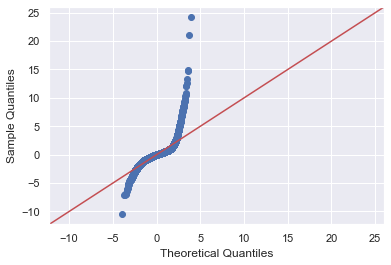

In [74]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

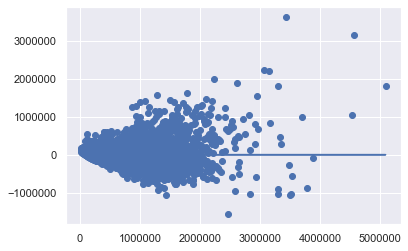

In [75]:
plt.scatter(model.predict(df_feats[x_cols]), model.resid)
plt.plot(model.predict(df_feats[x_cols]), [0 for i in range(len(df_feats))])

In [76]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('grade_6', 22.835059977839865),
 ('sqft_living', 147.43989310920614),
 ('grade_7', 92.94820739564055),
 ('grade_8', 59.85539111453218),
 ('grade_5', 3.521892379840088),
 ('zipcode_98004', 1.2174473914781623),
 ('zipcode_98023', 1.2648683055408327),
 ('grade_9', 25.003018594306315),
 ('waterfront_1_0', 1.552696435960654),
 ('sqft_living15', 3.321127045205911),
 ('zipcode_98003', 1.1479210414671104),
 ('zipcode_98092', 1.1933615586175852),
 ('zipcode_98038', 1.3288920214765867),
 ('zipcode_98002', 1.1151936541753482),
 ('zipcode_98032', 1.0691389241841531),
 ('zipcode_98039', 1.0535453865704847),
 ('bathrooms', 3.1905650624511077),
 ('zipcode_98033', 1.2377144847997472),
 ('zipcode_98040', 1.2251732558912267),
 ('zipcode_98112', 1.1760921989304949),
 ('zipcode_98115', 1.3423790364113755),
 ('zipcode_98117', 1.3317161496661472),
 ('zipcode_98103', 1.4259037557410432),
 ('zipcode_98199', 1.2041792707486623),
 ('zipcode_98105', 1.1422120024262383),
 ('zipcode_98119', 1.121470832920856),
 

## Cross Validation

In [77]:
linreg = LinearRegression()
cvs_10=cross_val_score(linreg, X, y, cv=10)
cvs_10_res_mean = round(np.mean(cvs_10),5)
cv_10_res_std = round(np.std(cvs_10),5)
print(f'Mean cross validation score for 10 fold is {cvs_10_res_mean}')
print(f'Standard deviation of the score is {cv_10_res_std}')

Mean cross validation score for 10 fold is 0.8291
Standard deviation of the score is 0.01232


In [78]:
cvs_10

array([0.80860156, 0.81852535, 0.8167555 , 0.82946666, 0.83425512,
       0.8332715 , 0.82275756, 0.85397068, 0.83940978, 0.83397268])

cvs_10_res_mean

In [79]:
cvs_10_res_mean

0.8291

In [80]:
cv_10_res_std

0.01232

##  Location! Location! Location!

In [87]:
income_df=df.copy()

In [88]:
from uszipcode import SearchEngine, Zipcode


In [89]:
search = SearchEngine(simple_zipcode=False)

In [84]:
zipcode = search.by_zipcode("98040")
zipcode.median_household_income

126359

In [90]:
def zco(x):
    income = search.by_zipcode(x)
    
    return income.median_household_income if income else x
   

In [91]:
income_df['income'] = income_df['zipcode'].astype(int).astype(str).apply(zco)

In [ ]:
income_df.head()

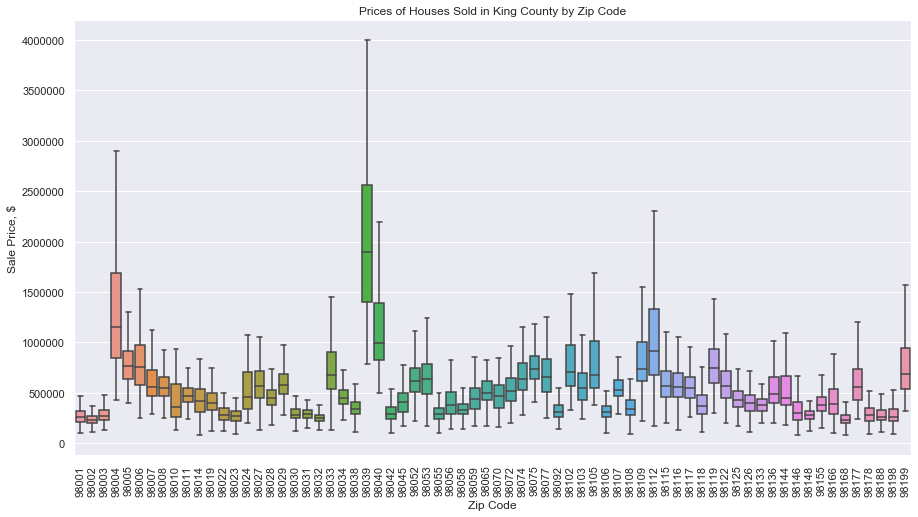

In [93]:
fig = plt.figure(figsize = (15,8))
fig = sns.boxplot(x='zipcode', y='price', data=income_df, showfliers = False)
plt.title('Prices of Houses Sold in King County by Zip Code')
plt.xlabel("Zip Code")
plt.xticks(rotation=90)
plt.ylabel('Sale Price, $')
plt.show()


## notes

future work:  garaj, pool, okul gradeleri

## web sites
hexbins with longitude and latitude 
https://medium.com/@mattheweparker/visualizing-data-with-hexbins-in-python-39823f89525e  



https://www.incomebyzipcode.com/washington/98109

https://medium.com/@allisonkelly42/exploratory-data-analysis-with-the-king-county-housing-data-c6d3f7eadc57

https://www.listendata.com/2018/01/linear-regression-in-python.html#Important-Model-Performance-Metrics

https://www.zillow.com/bellevue-wa-98004/
https://www.zillow.com/mercer-island-wa-98040/
https://www.zillow.com/medina-wa-98039/
https://www.zillow.com/seattle-wa-98112/

